# Zomato Exercise Solution

In this exercise we will analize the data set form very popular restaurant agrigator Zomato https://www.zomato.com

Exercise Goals & Objectives:
- Learn and prctice Pandas
- Practice filtering DataFrame
- Practice Matplotlib

Data Set:
- Using Pandas pd.read_csv() function read **zomato.csv** file, saved in the datasets folder

# 1. Import all necessary libriaries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Read the file in DataFrame format

If pd.read_csv() gives you encoding error use keyword argument in the function encoding="Latin1", also Windows might require liitle r letter before the file path
```
example:
pd.read_csv(r"file/path")
```

In [2]:
df = pd.read_csv("/Users/art/Arts_Python_Tutorial/zomato.csv", encoding="Latin1")

# 3. Use function head() to see the first 5 rows

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# 4. How many restaurants have the highest Aggregate rating?

In [8]:
max_rating = df["Aggregate rating"].max()
print(max_rating)
df["Restaurant Name"][df["Aggregate rating"]==max_rating].count()

4.9


61

# 5. What % of all restaurants have the highest rating?

In [15]:
total_res = df["Restaurant Name"].count()
best_res = df["Restaurant Name"][df["Aggregate rating"]==max_rating].count()
percent_of_best = round(best_res/total_res, 3)*100
percent_of_best

0.6

# 6. How many restaurants are in Abu Dhabi?

In [19]:
df["Restaurant Name"][df["City"]=="Abu Dhabi"].count()

20

In [23]:
df["Address"].iloc[55:56].to_string()

'55    Avenida Ataulfo de Paiva, 1022, Lojas A e B, L...'

# 7. How many restaurants in the state of WA (use column Address) ?

In [27]:
df["Restaurant Name"][df["Address"].str.contains("WA")].count()

18

# 8. Get the restauranst with the highest rating in New Delhi

In [35]:
new_delhi = df[df["City"]=="New Delhi"]
new_delhi_max_rating = new_delhi["Aggregate rating"].max()
new_delhi[new_delhi["Aggregate rating"]==new_delhi_max_rating]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3013,310143,Naturals Ice Cream,1,New Delhi,"L-8, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222148,28.634348,Ice Cream,...,Indian Rupees(Rs.),No,Yes,No,No,1,4.9,Dark Green,Excellent,2620
3601,2004,Indian Accent - The Manor,1,New Delhi,"The Manor, 77, Friends Colony, New Delhi",Friends Colony,"Friends Colony, New Delhi",77.257106,28.570142,Modern Indian,...,Indian Rupees(Rs.),No,No,No,No,4,4.9,Dark Green,Excellent,1934
4298,18345728,Masala Library,1,New Delhi,"21 A, Janpath, New Delhi",Janpath,"Janpath, New Delhi",77.218645,28.618245,Modern Indian,...,Indian Rupees(Rs.),No,No,No,No,4,4.9,Dark Green,Excellent,408


# 9. Which cousine is more popular Chinese of American?

In [45]:
no_nans = df.dropna()

no_nans["Restaurant Name"][no_nans["Cuisines"].str.contains("Chinese")].count()

2733

In [46]:
no_nans["Restaurant Name"][no_nans["Cuisines"].str.contains("American")].count()

405

# 10. What is the name and rating of the most expensive restaurant for two ('Average Cost for two')?

In [114]:
df[df["Average Cost for two"]==df["Average Cost for two"].max()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9283,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.1,Green,Very Good,1498
9284,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.6,Dark Green,Excellent,873


# 11. Find the most expensive Chinese restaurant in New Delhi in US Dollars 1 Indian Rupee is 0.013 United States Dollar

In [49]:
new_delhi = df[df["City"]=="New Delhi"].copy()
new_delhi["Price_in_US"] = new_delhi["Average Cost for two"]*0.013

In [51]:
chinese_res_new_delhi = new_delhi[new_delhi["Cuisines"].str.contains("Chinese")]

In [54]:
max_price_chinese_new_delhi = chinese_res_new_delhi["Price_in_US"].max()
max_price_chinese_new_delhi

91.0

In [55]:
chinese_res_new_delhi[chinese_res_new_delhi["Price_in_US"]==max_price_chinese_new_delhi]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Price_in_US
4088,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",...,No,No,No,No,4,4.1,Green,Very Good,188,91.0


# 12. Plot as a pie 5 cities with the highest number of restaurants

In [61]:
most_res = df.groupby("City")["Restaurant Name"].count()
most_res.sort_values(ascending=False, inplace=True)

<AxesSubplot:ylabel='Restaurant Name'>

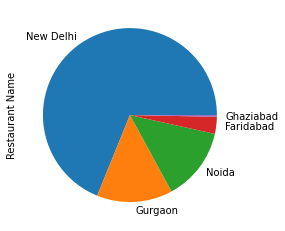

In [65]:
most_res[:5].plot.pie()

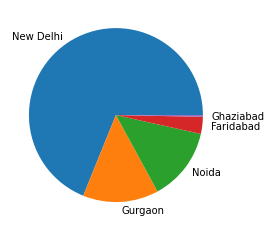

In [73]:
plt.pie(most_res[:5].values,labels=most_res[:5].index);